### E-news Express


In [3]:
# The libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user

In [10]:
# Importing necessary libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

In [13]:
df = pd.read_csv("abtest.csv")

In [17]:
# Reading the first and last five rows of our data frame
df

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish
...,...,...,...,...,...,...
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish


In [19]:
# Checking the number of rows and columns in the data frame
df.shape

(100, 6)

The data frame has 100 rows and 6 columns

In [21]:
# Checking columns data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


The dataset has six columns. Four of them are object, one  integer, and one float data types.

In [24]:
# Checking statistical summaries of the variables
df.describe(include="all")

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
count,100.000000,100,100,100.000000,100,100
unique,NaN,2,2,NaN,2,3
top,NaN,control,old,NaN,yes,Spanish
freq,NaN,50,50,NaN,54,34
mean,546517.000000,NaN,NaN,5.377800,NaN,NaN
std,52.295779,NaN,NaN,2.378166,NaN,NaN
min,546443.000000,NaN,NaN,0.190000,NaN,NaN
25%,546467.750000,NaN,NaN,3.880000,NaN,NaN
50%,546492.500000,NaN,NaN,5.415000,NaN,NaN
75%,546567.250000,NaN,NaN,7.022500,NaN,NaN


The important statistical insights regarding the time spent on the page are:
- mean (5.38 min)
- standard deviation (2.38 min)
- shortest time (0.19 min)
- longest (10.71 min)
  
  note (the above statistical data are pulled out of the whole data set, not considering the old or new landing pages)

  Also, statistical insights show that we have two landing pages, two converted categories, and three language categories.
  

In [27]:
# Checking for missing values
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

The dataset has no missing values.

In [30]:
# Checking for duplicates in the data set
df.duplicated().sum()

0

The data set has no duplicates

### Univariate Analysis

In [34]:
# Checking the count of unique values in the coloumn "group"
df.group.value_counts()

control      50
treatment    50
Name: group, dtype: int64

The coloumn "group" has two categorical values: "control" and "treatment". Each of them appears 50 times as expected

In [40]:
# Checking unique values in the coloumn "landing_page"
df.landing_page.value_counts()

old    50
new    50
Name: landing_page, dtype: int64

The coloumn "landing_page" has two categorical values: "old" and "new". Each of them appears50 times as expected

In [43]:
# Checking unique values in the coloumn "converted"
df.converted.value_counts()

yes    54
no     46
Name: converted, dtype: int64

The column "converted" contains two values: "yes" which appears 54 times, and "no" which appears 46 times.

In [46]:
# Checking unique values in the coloumn "language_preferred"
df.language_preferred.value_counts()

Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64

The column "language_preferred" contains three values: "Spanish" which appears 34 times, "French" which appears 34 times and "English" which appears 32 times

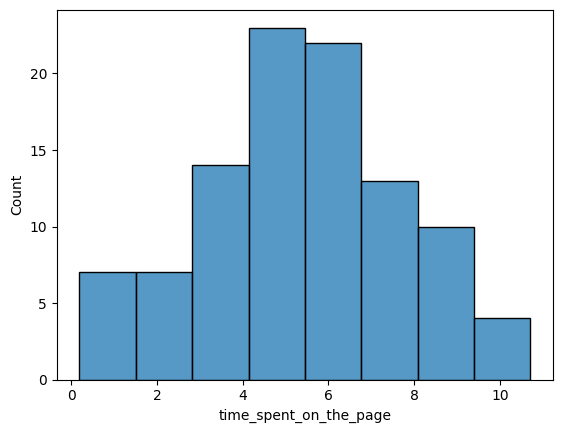

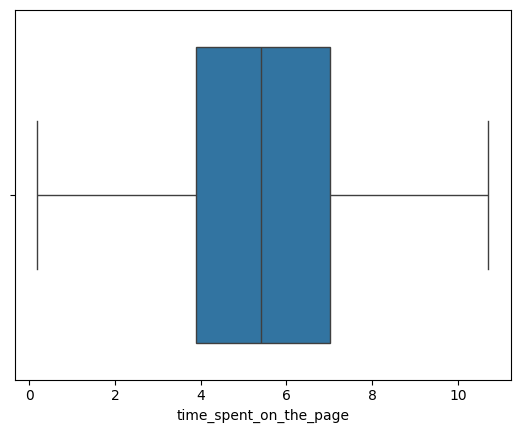

In [74]:
# Visualizing the column "time spent on the page"
sns.histplot(data=df,x="time_spent_on_the_page")
plt.show()
sns.boxplot(data=df,x="time_spent_on_the_page")
plt.show()

From the visualizations above we can tell that most frequently, users are spending between 4 and 7 minutes on the landing page, with the median time being approximately 5,5 minutes

### Bivariate Analysis

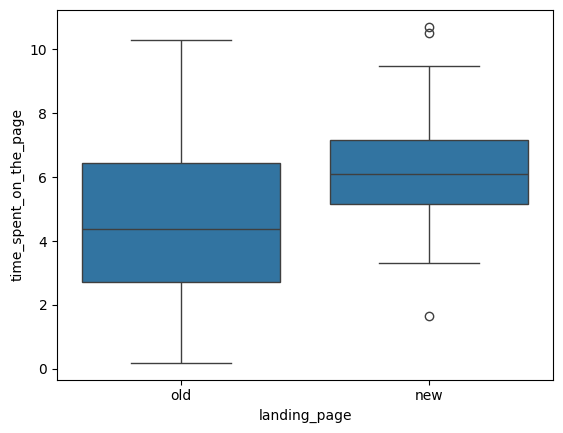

In [76]:
# Visualizing the user's time spent on old and new landing pages

sns.boxplot(data=df,x="landing_page", y="time_spent_on_the_page");

The graph above shows that users are spending more time on the new lending page compared to the old landing page.

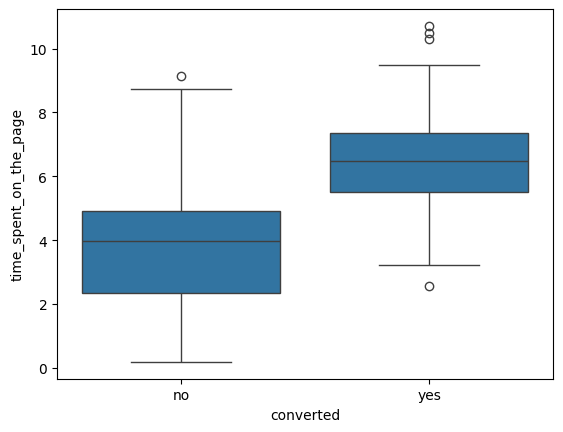

In [79]:
# Creating visualization to show the relationship between converted users and time spent on the page
sns.boxplot(data = df, x = "converted", y = "time_spent_on_the_page");

The graph above shows that converted users spend more time on the page compared to not converted users

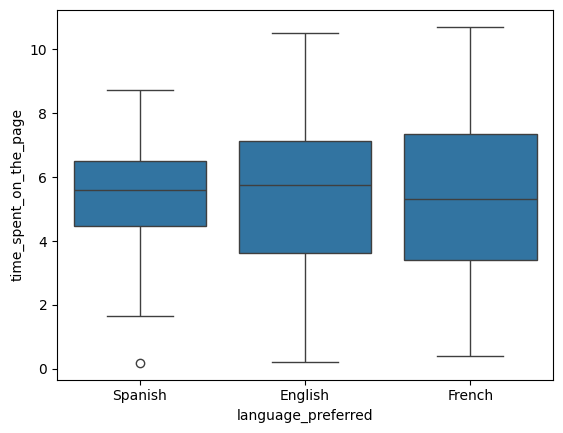

In [82]:
# Creating a plot to visualize the time spent on the page for each language
sns.boxplot(data = df, x = "language_preferred", y = "time_spent_on_the_page");

The plot shows that the median time spent on the page is very similar across all languages.

#### Performing Visual Analysis

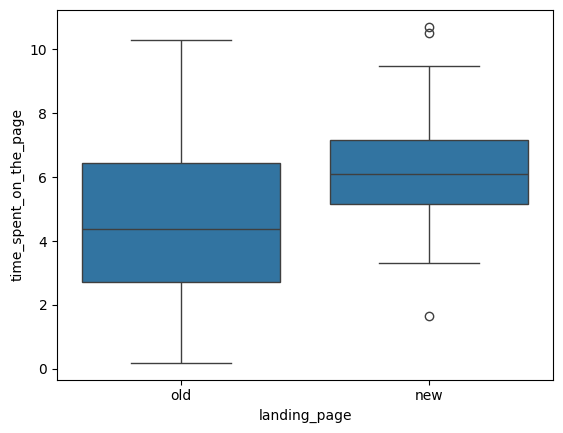

In [90]:
# Visualizing the user's time spent on the old and new landing pages

sns.boxplot(data=df,x="landing_page", y="time_spent_on_the_page");

The plot above indicates that users spent more time on the new landing page than the old one.

#### Defining the null and alternate hypotheses

> $H_0:$ The mean time spent on the new page is the same as the mean time spent on the old page.
> 
> $H_a:$ The mean time spent on the new page is greater then the mean time spent on the old page.

Mathematically, the above formulated hypotheses can be written as:

> $H_0: \mu_1 = \mu_2$
> 
> $H_a: \mu_1 < \mu_2$

Where:

>$\mu_1$ - is average time spent on the old page
>
>$\mu_2$ - is average time spent on the new page

#### Appropriate test

According to data and criterias, let's test if we can use two sample T test.
* Continuous data - yes. Time spent is measured on continuous scale
* Normally distributed - yes. We can assume the data is normally distributed as according to CLT our sample size is more than 30 and it can be assumed distributed normally.
* Independent populations - yes. We were informed that the two samples are independent of each other.
* Var - unknown.
  
We can use two sample T test.

#### Significance level

Significance level were provided at level of $\alpha=0.05$

#### Preparing data

In [99]:
# Computing sample means and standard deviations for the samples
mean_time_spent_old = df[df["landing_page"] == "old"]["time_spent_on_the_page"].mean()
mean_time_spent_new = df[df["landing_page"] == "new"]["time_spent_on_the_page"].mean()
std_old = df[df["landing_page"] == "old"]["time_spent_on_the_page"].std()
std_new = df[df["landing_page"] == "new"]["time_spent_on_the_page"].std()
print("mean_time_spent_old:", mean_time_spent_old,
      "\nmean_time_spent_new:", mean_time_spent_new,
      "\nstd_old:", std_old,
      "\nstd_new:", std_new)

mean_time_spent_old: 4.532400000000001 
mean_time_spent_new: 6.2232 
std_old: 2.581974849306046 
std_new: 1.8170310387878263


In [101]:
# Creating two separate data sets for the time spent on the page for old and new landing pages
old_page = df[df['landing_page'] == 'old']['time_spent_on_the_page']
new_page = df[df['landing_page'] == 'new']['time_spent_on_the_page']

#### Calculating the p-value

In [104]:
# Computing p-value using two sample T test
t_statistic, p_value = stats.ttest_ind(new_page, old_page, equal_var=False, alternative = "greater")
p_value

0.0001392381225166549

#### Comparing the p-value with $\alpha$

In [109]:
# Comparing p-value and alpha and printing the results
if p_value < 0.05:
    print(f'p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p-value 0.0001392381225166549 is less than the level of significance, we reject the null hypothesis.


#### Inference

Based on the results of two sample T test, the average time spent on the new landing page is more than the average time spent on the existing landing page.

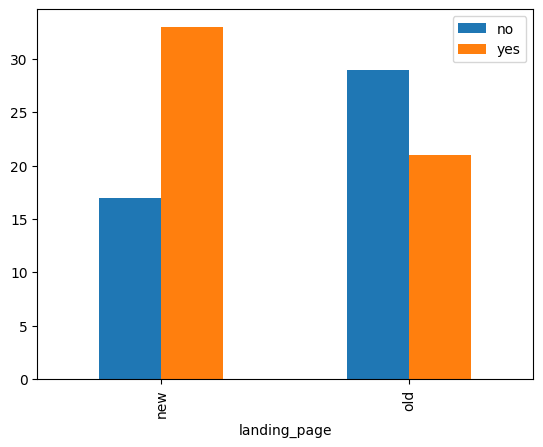

In [114]:
# Visualizing the conversion rate for new landing page vs old landing page
pd.crosstab(df["landing_page"], df["converted"]).plot(kind="bar")
plt.legend()
plt.show()

The graph above shows that there are more conversions on the new landing page compared to the old landing page.

### Defining the null and alternative hypothesis

Let $p_1,p_2$ be the proportions of conversions in the old and new landing pages, respectively.

We will test if the proportion of conversions is the same between the old and new landing pages.

$H_0:p_1=p_2$

Or if the proportion of conversions differs between the old and new landing pages.

$H_a:p_1 \neq p_2$

### Selecting appropriate test
* Do we have the binomally distributed population - yes.
* Do we have a random sampling from the population - yes.
* Do we have normal distribution - yes. According to CLT, if our sample size is greater than 30 we can assume it is normally distributed.

  ##### For this task, we will use Two Proportion Z-test

#### Significance level
Significance level is α = 0.05.

#### Preparing the data for test

In [121]:
# Finding the number of converted users for each page (new and old)
converted_new_page=df[df["group"] == "treatment"]["converted"].value_counts()["yes"]
converted_old_page=df[df["group"] == "control"]["converted"].value_counts()["yes"]

# Finding the number of users in control and treatment group
n_control = df.group.value_counts()["control"] 
n_treatment = df.group.value_counts()["treatment"]

#### Calculating the p-value

In [123]:
# Importing the function to perform Two Proportion Z-test
from statsmodels.stats.proportion import proportions_ztest

# Finding the p-value
test_stat, p_value = proportions_ztest([converted_new_page, converted_old_page] , [n_treatment, n_control], alternative ="larger")
p_value

0.008026308204056278

In [125]:
# Comparing p-value and alpha and printing the results
if p_value < 0.05:
    print(f'p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


#### Inferences
The conversion rate for the new page is greater than the conversion rate for the old page.


### Defining if the conversion and preferred language are independent or related?

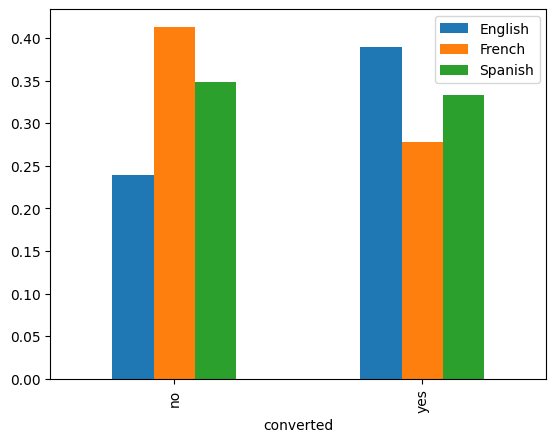

In [131]:
# Visualizing the dependency between conversions and language
pd.crosstab(df["converted"],df["language_preferred"],normalize="index").plot(kind="bar")
plt.legend()
plt.show()

Based on the visualization above, it appears that conversions might dependent on the preferred language.

Let's test it with hypothesis test.

#### Definig the null and alternative hypotesys

>$H_0:$ Conversions are independent of the language preferred
>
>$H_a:$ Conversions are not independent of the language preferred

#### Checking if we can use Chi-Square Test for this task

* Categorical variables - yes
* Expected value of the number of sample observations in each level of the variable is at least 5 - yes, the number of observations in each level is greater than 5.
* Random sampling from the population - yes, we are informed that the collected sample is a simple random sample.

##### We can use Chi-Square Test for this task

#### Significance level 
As given in the problem statement, we select α = 0.05.

In [140]:
# Creating contingency table for the test
language_converted = pd.crosstab(df["converted"], df["language_preferred"])

In [142]:
# Importing the necessary function to perform Chi-Square Test
from scipy.stats import chi2_contingency

# Performing Chi-Square test of independence
chi2, p_value, dof, expected = chi2_contingency(language_converted)
# Printing the p-value
print("p-value:", p_value)

p-value: 0.21298887487543447


In [144]:
# Comparing p-value and alpha and printing the results
if p_value < 0.05:
    print(f'p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


### Inferences
The test indicated that we don't have enough evidence to conclude that preferred language and conversion rate are dependent

### Checking if the time spent on the new page is the same for the different language users.

In [151]:
# Creating a new DataFrame specifically for the treatment group that used the new landing page
df_new = df[df["landing_page"] == "new"]

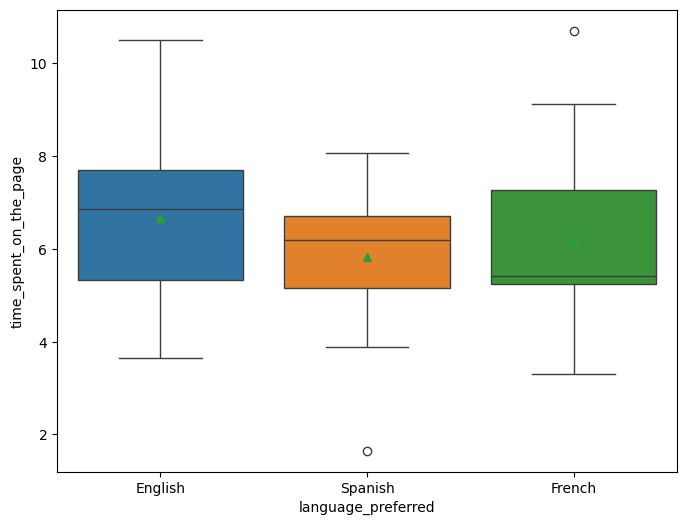

In [155]:
# Visualizing the time spent on the new page for each language
plt.figure(figsize=(8,6))
sns.boxplot(x = "language_preferred", y = "time_spent_on_the_page", showmeans = True, data = df_new, hue="language_preferred")
plt.show()


Based on the visualizations above, it is challenging to determine if the observed differences in time spent on the new page are statistically significant enough to conclude a dependency on the preferred language.

Let's calculate the average time for each language group to have more clear picture

In [158]:
# Calculating the mean time spent on the new page for different languages
df_new.groupby(["language_preferred"])["time_spent_on_the_page"].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Defining the null and alternative hypoteses

Let's define as $mu_1, mu_2, mu_3$ as means for time spent on the new page for Engish, Spanish and French respectively

> $𝐻_0: 𝜇_1=𝜇_2 \text{ and } 𝜇_1=𝜇_3 \text{ and } 𝜇_2=𝜇_3$
>
> $𝐻_a: 𝜇_1\neq𝜇_2 \text{ or } 𝜇_1\neq𝜇_3 \text{ or } 𝜇_2\neq𝜇_3$



### Levene’s test

Let's check if the variances are equal

We will test the null hypothesis

>$H_0$: All the population variances are equal

against the alternative hypothesis

>$H_a$: At least one variance is different from the rest

In [162]:
# Importing the required function
from scipy.stats import levene

# Calculating the p-value
statistic, p_value = levene(
    df_new['time_spent_on_the_page'][df_new['language_preferred'] == "English"],
    df_new['time_spent_on_the_page'][df_new['language_preferred'] == "Spanish"],
    df_new['time_spent_on_the_page'][df_new['language_preferred'] == "French"]
)

# Printing results
print("P-value:", p_value)

P-value: 0.46711357711340173


In [167]:
# Comparing p-value and alpha and printing the results
if p_value < 0.05:
    print(f'p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p-value 0.46711357711340173 is greater than the level of significance, we fail to reject the null hypothesis.


Since we failed to reject the null hypothesis we can assume that data variances are equal.

### Checking One-way ANOVA Test for this task
* The populations are normally distributed - yes. By the CLT if the sample size is bigger than 30 we can assume it is normally distributed
* Samples are independent simple random samples - yes, we are informed that the collected sample is a simple random sample.
* Population variances are equal - yes, the homogeneity of variance assumption is verified using the Levene's test.

##### We can use One-way ANOVA Test for this task




#### Computing p-value

In [174]:
# Importing the required function for One-way ANOVA Test 
from scipy.stats import f_oneway

# Performing one-way ANOVA test
test_stat, p_value = f_oneway( df_new["time_spent_on_the_page"][df_new["language_preferred"] == "English"],
    df_new["time_spent_on_the_page"][df_new["language_preferred"] == "Spanish"],
    df_new["time_spent_on_the_page"][df_new["language_preferred"] == "French"])
print("The p-value is " + str(p_value))

The p-value is 0.43204138694325955


In [176]:
# Comparing p-value and alpha and printing the results
if p_value < 0.05:
    print(f'p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


### Inferences

The One-way ANOVA test shows that the preferred language does not make a noticeable difference in how much time users spend on the new landing page.

## Conclusion and Business Recommendations

#### Based on our analysis of the dataset and testing various hypotheses, we found the following:

1. Users spend more time on the new landing page compared to the old one.
2. The new landing page converts more users than the old one.
3. Preferred language does not significantly impact the time users spend on the landing page.
4. Preferred language does not significantly affect the user conversion rate.
5. Converted users spent more time on the page compared to non-converted users.

#### Recommendations:

* Transition to the new landing page.  Since users spend more time on the new landing page and it converts more users than the old one, transitioning all users to the new landing page would likely improve engagement and increase subscriptions.
* Since the new landing page effectively improved user interest, consider further developing and enhancing it to increase user engagement and subscriptions even further.
* Continue to monitor user behavior and feedback to adapt strategies. Keep monitoring to make sure it aligns with what users like and with new technology.

___